## Домашка 1
#### *«Великаны — как луковицы. Лук многослоен! Я тоже! Слой за слоем. Ты усёк? Мы многослойные!» — Шрек*

Эта домашка про декомпозицию и срезы. За неё можно получить максимум 6 баллов. На решение отводится **14 календарных дней** с момента выдачи. Обратите внимание, что **дедлайны на курсе сразу жёсткие**, а значит отправка решений после них запрещена.
Задание выполняется самостоятельно, списывания не допускаются. При обнаружении одинаковых работ балл за задание анулируется у всех студентов, вне зависимости от того, кто у кого списал.

#### **Как сдать домашку?**
1. Скачайте этот ноутбук.
2. Решите задания (локально или в Google Colab).
3. Опубликуйте решенный ноутбук в свой GitHub репозиторий (проверьте, чтобы он был публичным).
4. Приложите ссылку на решение в Яндекс-Форму для сдачи ДЗ (будет доступна на LMS Karpov Courses и в Телеграм-канале курса).

**Внимание**: Если вы работаете в Google Colab, также скачивайте .ipynb файл и публикуйте его в репозитории. Ссылки на Colab к сдаче не принимаются.


Все датасеты, с которыми предлагается работать в домашних заданиях, взяты из открытых источников или сгенерированы. Любые паттерны, найденные вне заданной канвы решения, являются случайными и не несут в себе смысла или инсайта.

[Данные](https://github.com/brezhnevaan/hse_product_metrics_course/releases/download/datasets_for_hw/hw_1_data.zip)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# your code is here
import io


### Case Study. Что-то пошло не так в маркетплейсе 🛒

**Легенда**  
Вы работаете продуктовым аналитиком в маркетплейсе. Ваша команда отвечает за функционал корзины — точки входа, дизайн и функционал самой корзины, путь пользователя с момента добавления товара в корзину и до оформления покупки.

Компания — стартап без системы автоматического мониторинга. Поэтому последние 14 дней, пока вы были в отпуске, никто не следил за метриками корзины.

Вы отлично отдохнули и в первый же день после каникул рвётесь в бой. Наливаете чашку кофе, открываете ноутбук и проверяете, что творилось в ваше отсутствие.

In [6]:
df = pd.read_parquet('/hw_1_marketplace_data.parquet')

In [7]:
df.head()

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity
0,30,1094418511,2025-04-01 19:49:57,Desktop,web,siberia,ads_search,None,search,NaN,NaN,NaN
1,30,1094418511,2025-04-01 20:02:23,Desktop,web,siberia,ads_search,electronics,view_item,123443.0,NaN,NaN
2,30,1094418511,2025-04-01 20:22:53,Desktop,web,siberia,ads_search,fashion,view_item,162950.0,NaN,NaN
3,30,1094418511,2025-04-01 20:40:57,Desktop,web,siberia,ads_search,home,view_item,199979.0,NaN,NaN
4,30,1094418511,2025-04-01 20:41:07,Desktop,web,siberia,ads_search,home,add_to_cart,199979.0,NaN,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='product_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['event_ts']
  ys = series['product_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('event_ts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_ts')
_ = plt.ylabel('product_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['event_ts']
  ys = series['product_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('event_ts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('event')):
  _plot_series(series, series_name, i)
  fig.legend(title='event', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_ts')
_ = plt.ylabel('product_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['event_ts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'event_ts'}, axis=1)
              .sort_values('event_ts', ascending=True))
  xs = counted['event_ts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('event_ts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_ts')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['event_ts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'event_ts'}, axis=1)
              .sort_values('event_ts', ascending=True))
  xs = counted['event_ts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('event_ts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('event')):
  _plot_series(series, series_name, i)
  fig.legend(title='event', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_ts')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['product_id'].plot(kind='line', figsize=(8, 4), title='product_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['event'].value_counts()
    for x_label, grp in _df_11.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('event')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['event'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='event', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='product_id', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['event'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='product_id', y='event', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [23]:
df.event.unique()

array(['search', 'view_item', 'add_to_cart', 'add_to_favorites',
       'purchase', 'remove_from_cart'], dtype=object)

Описание данных

- user_id — уникальный идентификатор пользователя
- session_id — уникальный идентификатор сессии
- event_ts — таймстемп событий
- platform — платформа, с которой пришло событие
- app_version — версия приложения (существует только для iOS и Android, для остальных платформ приходят значения-заглушки)
- region — регион пользователя
- channel — канал, с которого пришел пользователь
- category — категория товаров, которой принадлежит ивент
- event — событие, совершенное пользователем
- product_id — идентификатор товара для событий над товарами
- price — цена товара, ивент приходит только для события покупки
- quantity — количество товаров, ивент приходит только для события покупки

#### **1. Детекция проблемы — 1 балл**

1) Посчитайте подневные конверсии: из просмотра в покупку, из просмотра в добавление в корзину, из добавления в корзину — в покупку.
2) Визуализируйте полученную динамику.
3) Опишите, что вы видите на графике: когда и в каких метриках началось падение? есть ли устойчивый тренд?

*К подсчёту конверсий можно подойти разными способами — считать их по событиям, сессиям или уникальным юзерам. В нашей задаче будем считать по сессиям.*

In [16]:

df['event_ts'] = pd.to_datetime(df['event_ts'])


df['event_date'] = df['event_ts'].dt.date

# Подсчёт уникальных пользователей для каждого события по дням
daily_events = df.groupby(['event_date', 'event'])['user_id'].nunique().unstack(fill_value=0)


# конверсии
daily_events['view_to_purchase_conversion'] = daily_events['purchase'] / daily_events['view_item']
daily_events['view_to_cart_conversion'] = daily_events['add_to_cart'] / daily_events['view_item']
daily_events['cart_to_purchase_conversion'] = daily_events['purchase'] / daily_events['add_to_cart']


In [18]:
daily_events.head(2)

event,add_to_cart,add_to_favorites,purchase,remove_from_cart,search,view_item,view_to_purchase_conversion,view_to_cart_conversion,cart_to_purchase_conversion
event_date,,,,,,,,,
2025-04-01,567,530,204,50,955,1376,0.148256,0.412064,0.359788
2025-04-02,585,546,199,56,984,1448,0.137431,0.404006,0.340171


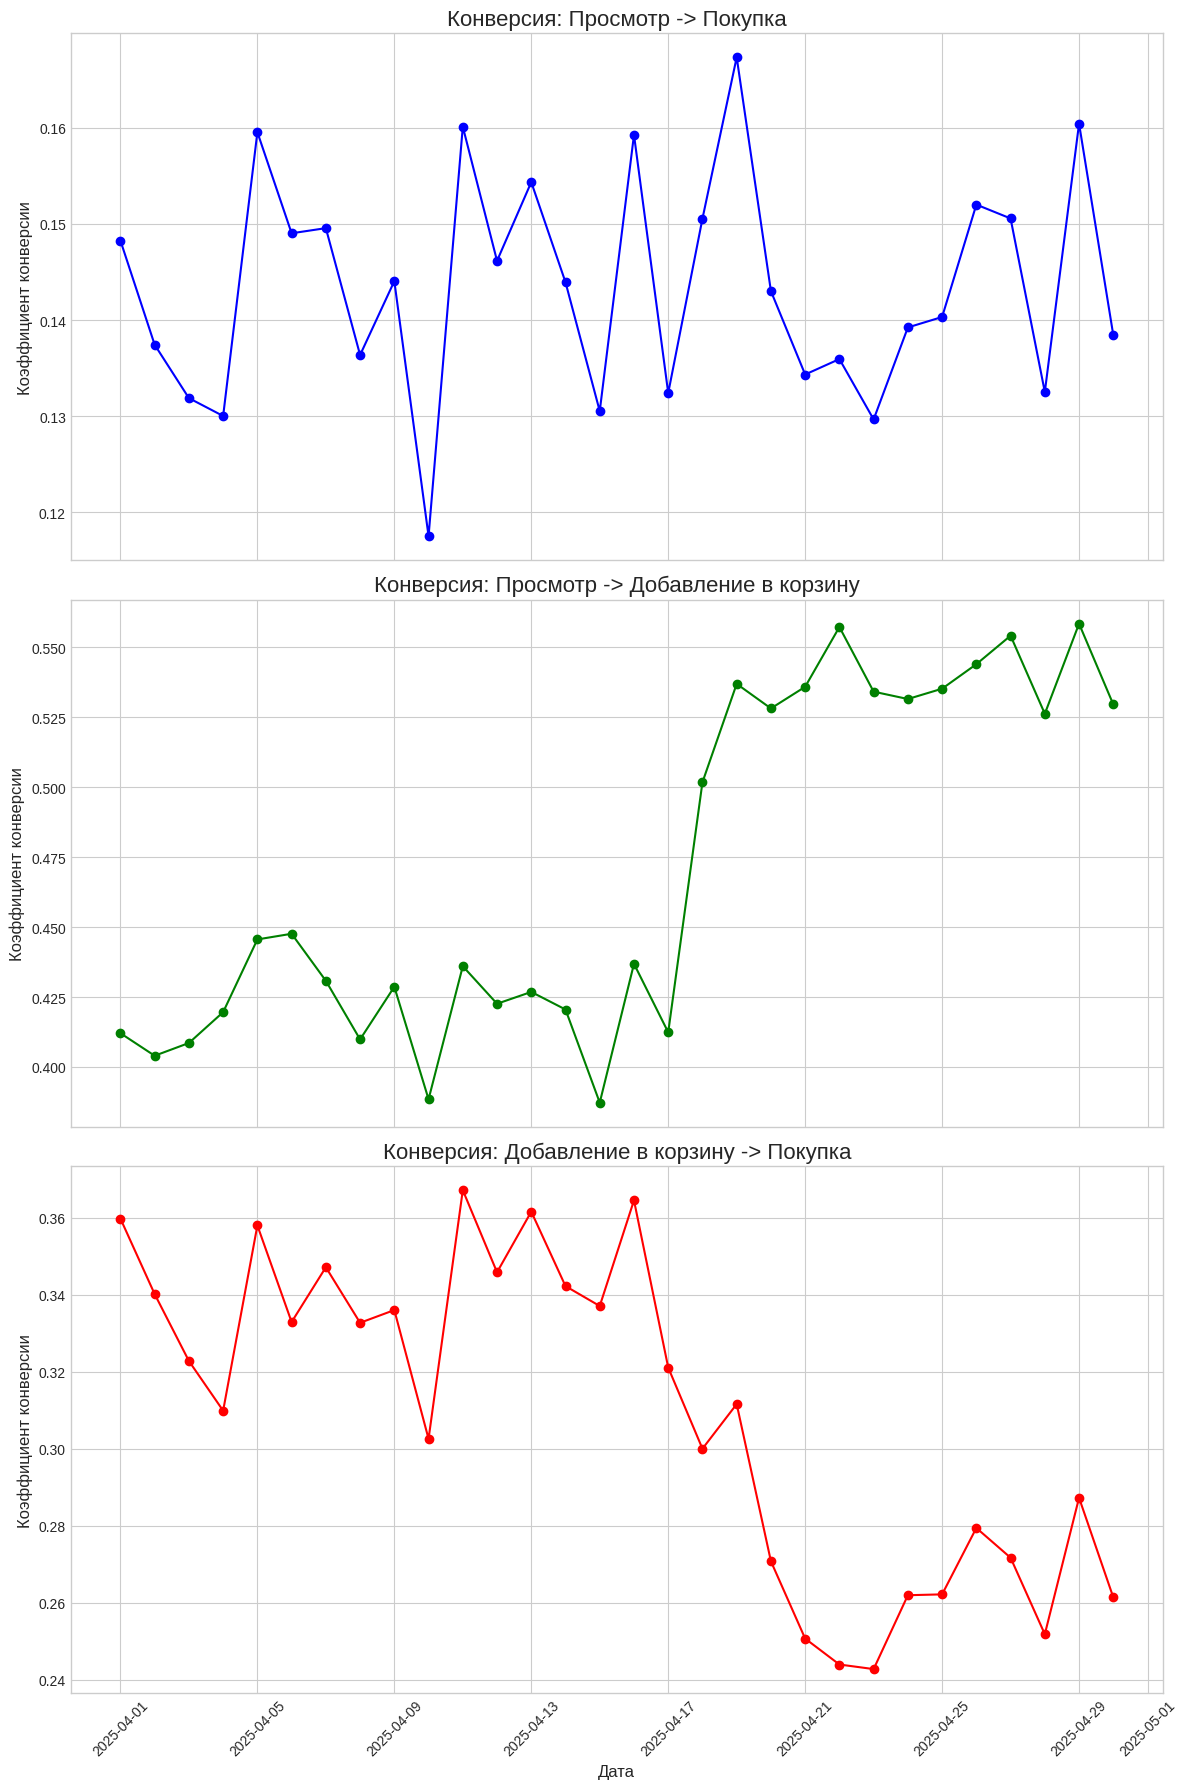

In [19]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

daily_events['view_to_purchase_conversion'].plot(ax=ax1, marker='o', color='blue', linestyle='-')
ax1.set_title('Конверсия: Просмотр -> Покупка', fontsize=16)
ax1.set_ylabel('Коэффициент конверсии', fontsize=12)
ax1.set_xlabel('Дата', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

daily_events['view_to_cart_conversion'].plot(ax=ax2, marker='o', color='green', linestyle='-')
ax2.set_title('Конверсия: Просмотр -> Добавление в корзину', fontsize=16)
ax2.set_ylabel('Коэффициент конверсии', fontsize=12)
ax2.set_xlabel('Дата', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

daily_events['cart_to_purchase_conversion'].plot(ax=ax3, marker='o', color='red', linestyle='-')
ax3.set_title('Конверсия: Добавление в корзину -> Покупка', fontsize=16)
ax3.set_ylabel('Коэффициент конверсии', fontsize=12)
ax3.set_xlabel('Дата', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()

Опишите, что вы видите на графике: когда и в каких метриках началось падение? есть ли устойчивый тренд?


*   Конверсия из просмотра в покупку не показывает устойчивого тренда, метрика колеблеться в пределах "обычных" значений
*   Конверсия из просмотра в добавление в корзину - резко пошла вверх, наметился тренд
*   При этом конверсия из добавление в корзину в покупку - пошла вниз. Это может быть связано с предыдущим пунктом, пришло больше людей, которые хуже конвертируются    


#### **2. Проверка абсолютных и средних значений — 1 балл**

1) Постройте графики дневной динамики абсолютных значений, из которых рассчитаны конверсии выше.
2) Рассчитайте и визуализируйте среднее число событий (именно событий, не сессий), из которых рассчитаны конверсии, на пользователя.
3) На каком этапе воронки появилась проблема?

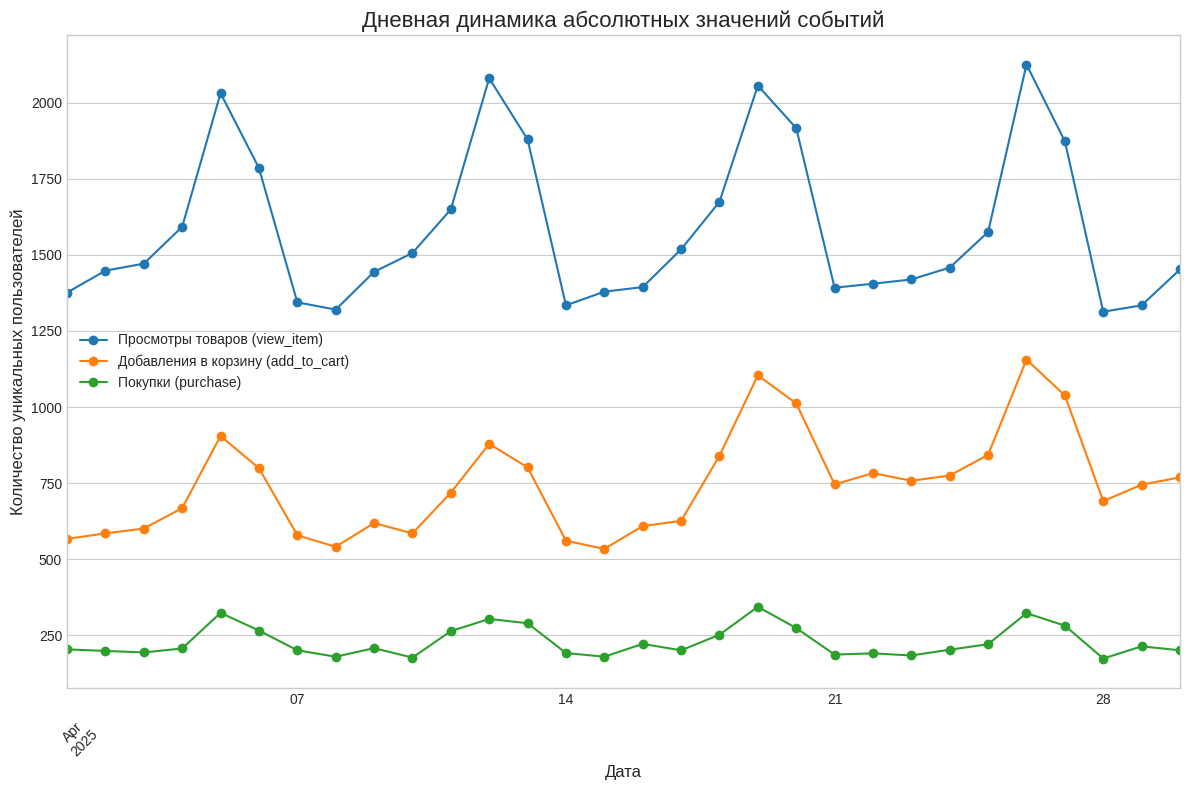

In [31]:
daily_events = df.groupby(['event_date', 'event'])['user_id'].nunique().unstack(fill_value=0)
daily_events.index = pd.to_datetime(daily_events.index)

# Построение графика для абсолютных значений ключевых событий
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
daily_events[['view_item', 'add_to_cart', 'purchase']].plot(ax=ax, marker='o')
ax.set_title('Дневная динамика абсолютных значений событий', fontsize=16)
ax.set_ylabel('Количество уникальных пользователей', fontsize=12)
ax.set_xlabel('Дата', fontsize=12)
ax.legend(['Просмотры товаров (view_item)', 'Добавления в корзину (add_to_cart)', 'Покупки (purchase)'])
ax.grid(True)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [34]:
avg_events_data = pd.DataFrame(index=pd.to_datetime(df['event_date'].unique()).sort_values())
avg_events_data.index.name = 'event_date'

# 'view_item'
df_views = df[df['event'] == 'view_item']
avg_views = df_views.groupby(['event_date', 'user_id'])['event'].count().groupby('event_date').mean()
avg_events_data['avg_views_per_user'] = avg_views

# 'add_to_cart'
df_carts = df[df['event'] == 'add_to_cart']
avg_carts = df_carts.groupby(['event_date', 'user_id'])['event'].count().groupby('event_date').mean()
avg_events_data['avg_carts_per_user'] = avg_carts

# 'purchase'
df_purchases = df[df['event'] == 'purchase']
avg_purchases = df_purchases.groupby(['event_date', 'user_id'])['event'].count().groupby('event_date').mean()
avg_events_data['avg_purchases_per_user'] = avg_purchases

In [35]:
avg_events_data

,avg_views_per_user,avg_carts_per_user,avg_purchases_per_user
event_date,,,
2025-04-01,3.279070,1.285714,1.068627
2025-04-02,3.338398,1.304274,1.070352
2025-04-03,3.334466,1.294509,1.067010
2025-04-04,3.346734,1.297904,1.096618
2025-04-05,3.632693,1.348066,1.080247
2025-04-06,3.654342,1.329161,1.063910
2025-04-07,3.352679,1.298791,1.029851
2025-04-08,3.353788,1.269871,1.038889
2025-04-09,3.318560,1.302100,1.048077


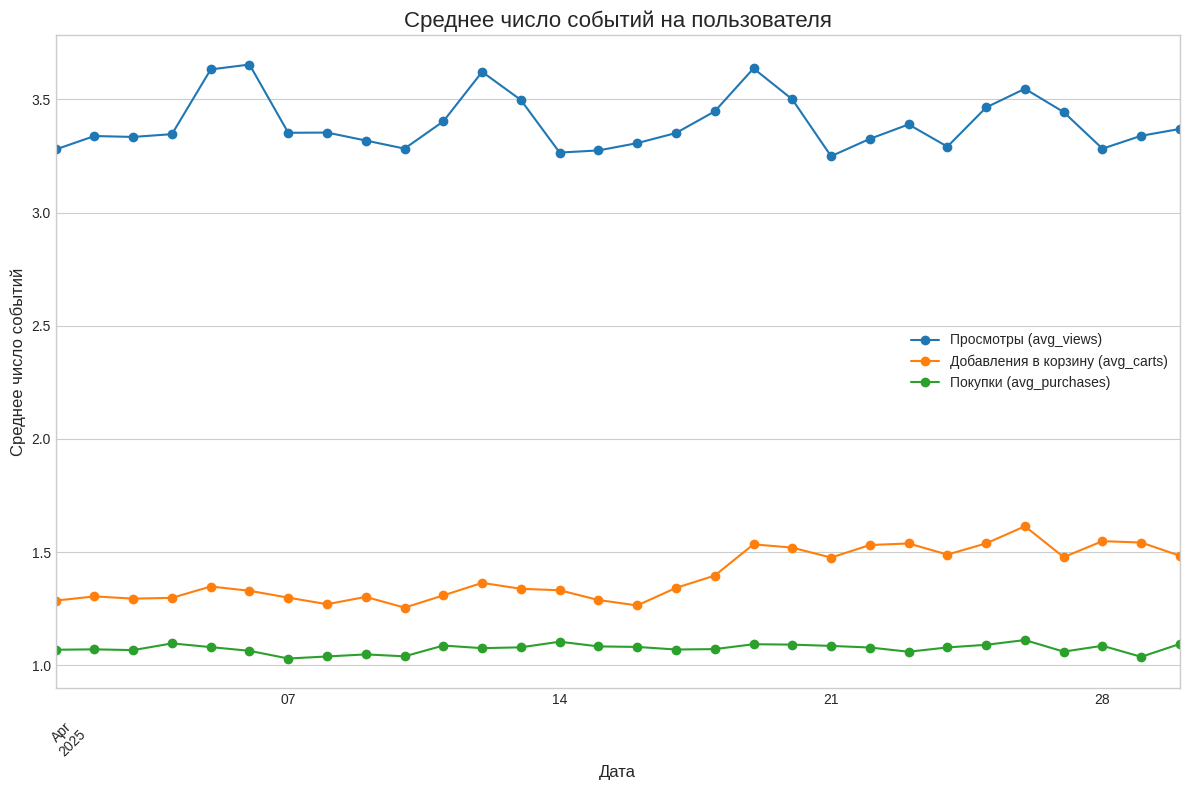

In [36]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

avg_events_data.plot(ax=ax, marker='o')

ax.set_title('Среднее число событий на пользователя', fontsize=16)
ax.set_ylabel('Среднее число событий', fontsize=12)
ax.set_xlabel('Дата', fontsize=12)
ax.legend(['Просмотры (avg_views)', 'Добавления в корзину (avg_carts)', 'Покупки (avg_purchases)'])
ax.grid(True)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

 На каком этапе воронки появилась проблема?

Скорее всего на этапе добавления в корзину

#### **3. Базовые срезы — 1 балл**
1. Постройте динамику проблемного события в разрезе:
- платформ,
- регионов,
- источников трафика,
- категорий товаров.

2. Есть ли выделяющийся срез?

*В этом пункте в качестве события продолжаем смотреть метрику среднего на пользователя*

In [37]:
problematic_event_name = 'remove_from_cart'

# Группировка по всем четырем разрезам
df_platforms = df[df['event'] == problematic_event_name].groupby(['event_date', 'platform']).size().unstack(fill_value=0)
df_regions = df[df['event'] == problematic_event_name].groupby(['event_date', 'region']).size().unstack(fill_value=0)
df_channels = df[df['event'] == problematic_event_name].groupby(['event_date', 'channel']).size().unstack(fill_value=0)
df_categories = df[df['event'] == problematic_event_name].groupby(['event_date', 'category']).size().unstack(fill_value=0)

df_platforms.index = pd.to_datetime(df_platforms.index)
df_regions.index = pd.to_datetime(df_regions.index)
df_channels.index = pd.to_datetime(df_channels.index)
df_categories.index = pd.to_datetime(df_categories.index)

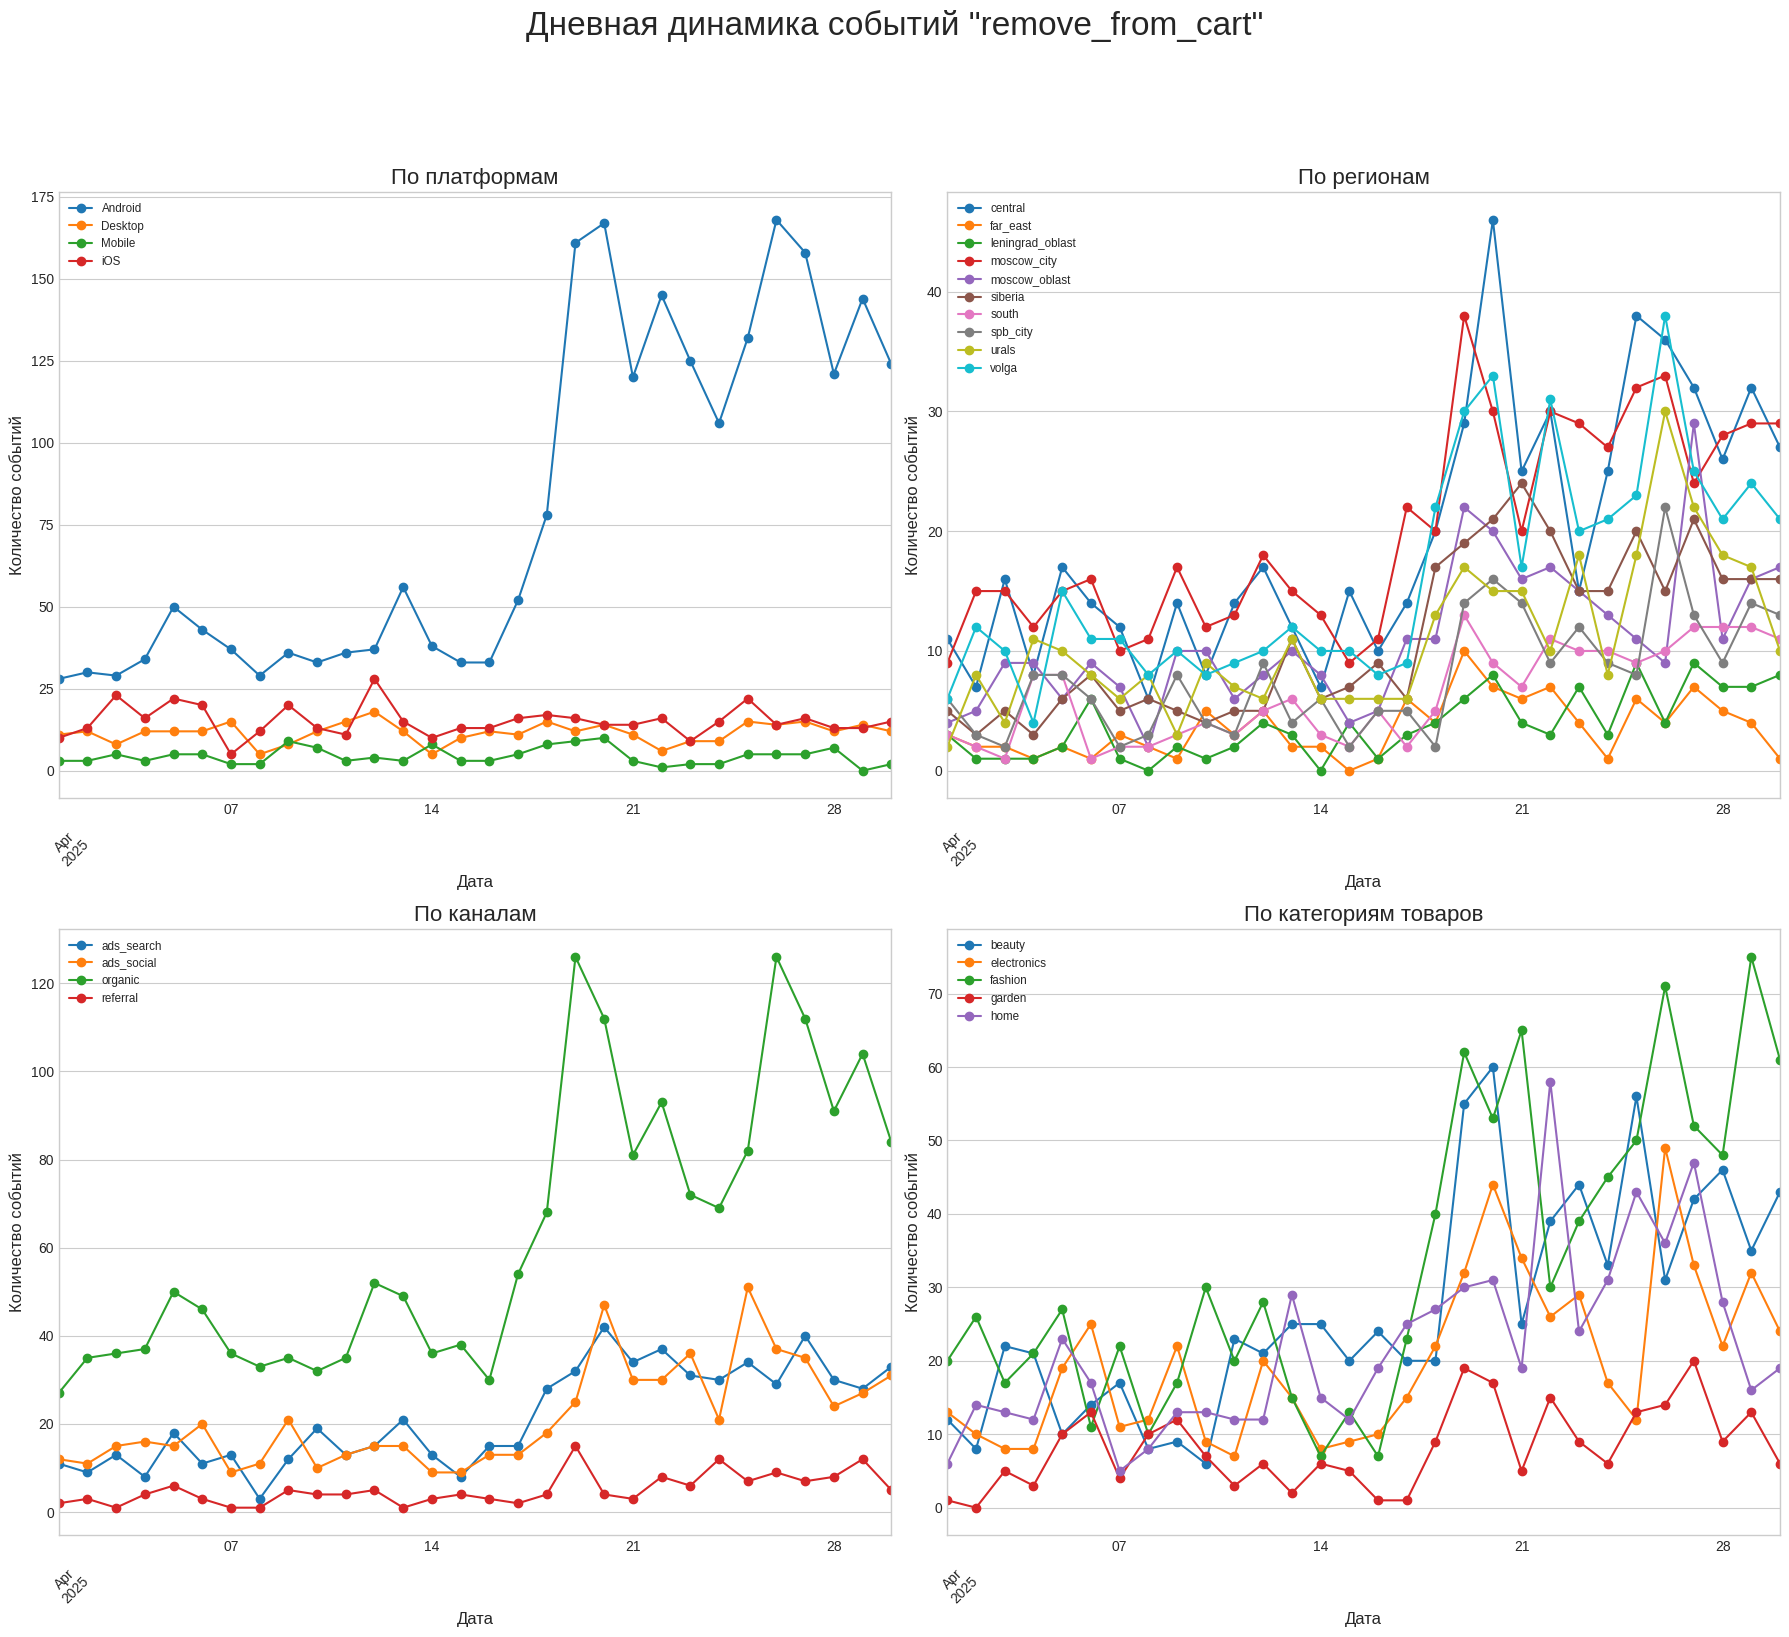

In [39]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(18, 16))
fig.suptitle(f'Дневная динамика событий "{problematic_event_name}"', fontsize=24, y=1.02)

# График по платформам
df_platforms.plot(ax=axes[0, 0], marker='o')
axes[0, 0].set_title('По платформам', fontsize=16)
axes[0, 0].set_ylabel('Количество событий', fontsize=12)

# График по регионам
df_regions.plot(ax=axes[0, 1], marker='o')
axes[0, 1].set_title('По регионам', fontsize=16)
axes[0, 1].set_ylabel('Количество событий', fontsize=12)

# График по каналам
df_channels.plot(ax=axes[1, 0], marker='o')
axes[1, 0].set_title('По каналам', fontsize=16)
axes[1, 0].set_ylabel('Количество событий', fontsize=12)

# График по категориям
df_categories.plot(ax=axes[1, 1], marker='o')
axes[1, 1].set_title('По категориям товаров', fontsize=16)
axes[1, 1].set_ylabel('Количество событий', fontsize=12)

# Общие настройки для всех графиков
for ax in axes.flat:
    ax.set_xlabel('Дата', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='', fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Есть ли выделяющийся срез?

явно выделяется платформа Андроид, органический трафик.

также похожий тренд показывает fashion

#### **4. Детальные срезы — 1 балл**
1. Постройте динамику события для iOS и Android с разложением по версиям приложения.
2. Помогло ли это локализовать проблему?

*В этом пункте в качестве события продолжаем смотреть метрику среднего на пользователя*

In [47]:
df.head(2)

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity,event_date
0,30,1094418511,2025-04-01 19:49:57,Desktop,web,siberia,ads_search,None,search,NaN,NaN,NaN,2025-04-01
1,30,1094418511,2025-04-01 20:02:23,Desktop,web,siberia,ads_search,electronics,view_item,123443.0,NaN,NaN,2025-04-01


In [48]:
df.platform.unique()

array(['Desktop', 'Mobile', 'Android', 'iOS'], dtype=object)

In [50]:
# 2. Подготовка данных для визуализации
problematic_event_name = 'view_item'

df_ios = df[(df['platform'] == 'iOS') & (df['event'] == problematic_event_name)]
df_android = df[(df['platform'] == 'Android') & (df['event'] == problematic_event_name)]

# Группировка для iOS
ios_dynamics = df_ios.groupby(['event_date', 'app_version']).size().unstack(fill_value=0)
ios_dynamics.index = pd.to_datetime(ios_dynamics.index)

# Группировка для Android
android_dynamics = df_android.groupby(['event_date', 'app_version']).size().unstack(fill_value=0)
android_dynamics.index = pd.to_datetime(android_dynamics.index)
df_ios.head(2)

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity,event_date
42,164,7120241942,2025-04-01 18:28:16,iOS,5.13.0,central,ads_search,fashion,view_item,116019.0,NaN,NaN,2025-04-01
47,177,2319288456,2025-04-01 12:59:46,iOS,5.13.0,siberia,organic,fashion,view_item,100166.0,NaN,NaN,2025-04-01


In [51]:
df_android.head(2)

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity,event_date
18,66,3106202526,2025-04-01 19:12:23,Android,12.4.0,siberia,organic,fashion,view_item,117673.0,NaN,NaN,2025-04-01
19,66,3106202526,2025-04-01 18:45:38,Android,12.4.0,siberia,organic,fashion,view_item,194335.0,NaN,NaN,2025-04-01


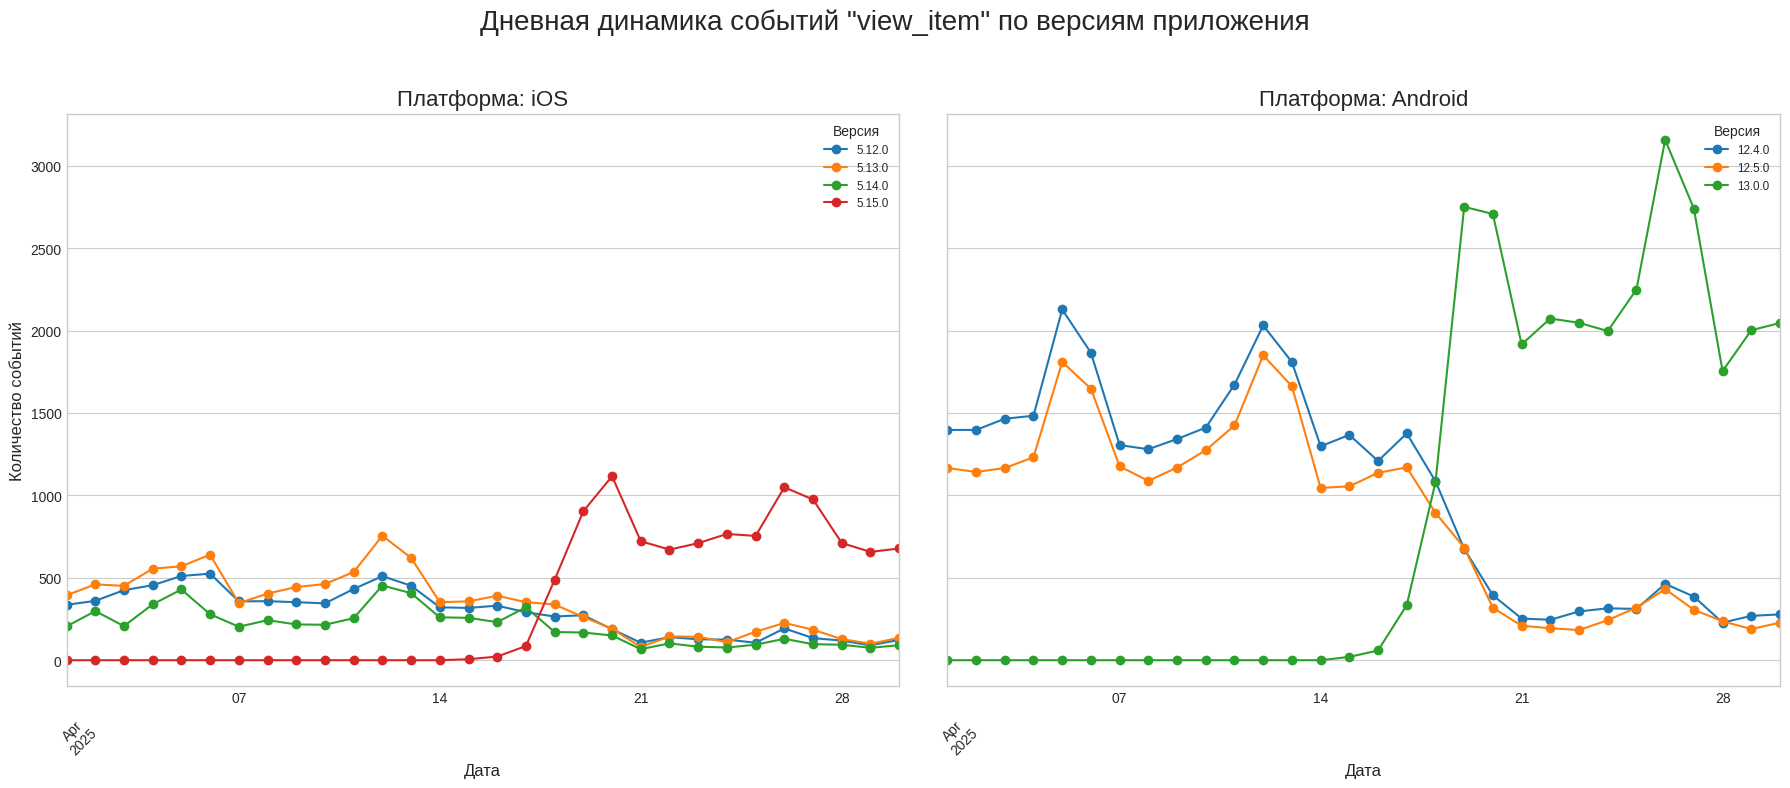

In [52]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle(f'Дневная динамика событий "{problematic_event_name}" по версиям приложения', fontsize=20)

# Проверка на пустоту датафрейма для iOS
if not ios_dynamics.empty:
 ios_dynamics.plot(ax=axes[0], marker='o')
 axes[0].set_title('Платформа: iOS', fontsize=16)
 axes[0].set_ylabel('Количество событий', fontsize=12)
 axes[0].set_xlabel('Дата', fontsize=12)
 axes[0].legend(title='Версия', fontsize='small')
 axes[0].tick_params(axis='x', rotation=45)
else:
 axes[0].set_title('Платформа: iOS', fontsize=16)
 axes[0].text(0.5, 0.5, 'Нет данных для этого события', ha='center', va='center', fontsize=14)
 axes[0].set_xticks([])
 axes[0].set_yticks([])

# Проверка на пустоту датафрейма для Android
if not android_dynamics.empty:
 android_dynamics.plot(ax=axes[1], marker='o')
 axes[1].set_title('Платформа: Android', fontsize=16)
 axes[1].set_ylabel('Количество событий', fontsize=12)
 axes[1].set_xlabel('Дата', fontsize=12)
 axes[1].legend(title='Версия', fontsize='small')
 axes[1].tick_params(axis='x', rotation=45)
else:
 axes[1].set_title('Платформа: Android', fontsize=16)
 axes[1].text(0.5, 0.5, 'Нет данных для этого события', ha='center', va='center', fontsize=14)
 axes[1].set_xticks([])
 axes[1].set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Помогло ли это локализовать проблему?

Видно, что проблема у последних версий, особенно андроид 13й.

У ios 5.15 также вопросы

#### **5. Поиск причин — 1 балл**
1. Для проблемной платформы постройте динамику ВСЕХ событий в разрезе версий приложения.
2. Сформулируйте гипотезу, что именно могло пойти не так в новом релизе? Может быть, пользователи стали заменять один функционал другим?

*В этом пункте в качестве событий продолжаем смотреть метрику среднего на пользователя*

In [54]:
# your code is here
problematic_event_name = 'remove_from_cart'
problem_platform = df[df['event'] == problematic_event_name].groupby('platform').size().idxmax()
print(f"Проблемная платформа, выявленная по событию '{problematic_event_name}': {problem_platform}")

Проблемная платформа, выявленная по событию 'remove_from_cart': Android


In [56]:
df.head(2)

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity,event_date
0,30,1094418511,2025-04-01 19:49:57,Desktop,web,siberia,ads_search,None,search,NaN,NaN,NaN,2025-04-01
1,30,1094418511,2025-04-01 20:02:23,Desktop,web,siberia,ads_search,electronics,view_item,123443.0,NaN,NaN,2025-04-01


In [61]:

#   для визуализации
problematic_platform_df = df[df['platform'] == problem_platform]
event_dynamics_by_version = problematic_platform_df.groupby(['event_date', 'event', 'app_version']).size().unstack(level=['event', 'app_version'], fill_value=0)
event_dynamics_by_version.index = pd.to_datetime(event_dynamics_by_version.index)

In [62]:
event_dynamics_by_version

event       add_to_cart        add_to_favorites        purchase         \
app_version      12.4.0 12.5.0           12.4.0 12.5.0   12.4.0 12.5.0   
event_date                                                               
2025-04-01          229    181              203    151       68     57   
2025-04-02          218    176              188    158       45     49   
2025-04-03          226    176              214    148       61     45   
2025-04-04          219    210              179    160       49     59   
2025-04-05          338    298              312    255      101     75   
2025-04-06          299    258              239    239       77     65   
2025-04-07          223    200              179    157       67     57   
2025-04-08          203    170              172    144       56     43   
2025-04-09          215    215              189    177       50     59   
2025-04-10          216    194              218    148       61     47   
2025-04-11          294    248              249    163       87     73   
2025-04-12          302    315              272    252       75     84   
2025-04-13          296    300              245    251       79     81   
2025-04-14          211    196              175    155       61     61   
2025-04-15          216    162              194    159       57     48   
2025-04-16          196    167              198    166       73     45   
2025-04-17          193    181              170    174       51     46   
2025-04-18          188    147              154    123       55     39   
2025-04-19           96    117              103    105       33     34   
2025-04-20           62     43               58     42       12     13   
2025-04-21           35     36               36     36        9     13   
2025-04-22           43     22               33     25        6      4   
2025-04-23           45     24               38     29       12      6   
2025-04-24           58     39               37     40       14      9   
2025-04-25           49     48               54     52       15     15   
2025-04-26           82     63               64     66       22     14   
2025-04-27           67     57               46     44       18     16   
2025-04-28           36     40               36     25        7     15   
2025-04-29           47     32               40     28       14      9   
2025-04-30           37     34               46     37        8     10   

event       remove_from_cart        search        view_item         \
app_version           12.4.0 12.5.0 12.4.0 12.5.0    12.4.0 12.5.0   
event_date                                                           
2025-04-01                15     13    372    316      1397   1166   
2025-04-02                18     12    372    304      1397   1142   
2025-04-03                16     13    391    319      1465   1166   
2025-04-04                17     17    377    299      1483   1231   
2025-04-05                23     27    610    463      2128   1810   
2025-04-06                24     19    464    418      1865   1647   
2025-04-07                21     16    324    287      1305   1176   
2025-04-08                21      8    333    312      1280   1088   
2025-04-09                15     21    333    331      1342   1169   
2025-04-10                13     20    364    301      1411   1274   
2025-04-11                23     13    420    392      1672   1424   
2025-04-12                23     14    540    507      2031   1850   
2025-04-13                33     23    482    438      1809   1662   
2025-04-14                20     18    360    280      1298   1045   
2025-04-15                24      9    358    289      1367   1055   
2025-04-16                15     14    318    296      1209   1137   
2025-04-17                16     15    341    270      1376   1170   
2025-04-18                11      8    275    232      1086    894   
2025-04-19                 6     12    192    139       676    683   
2025-04-20       

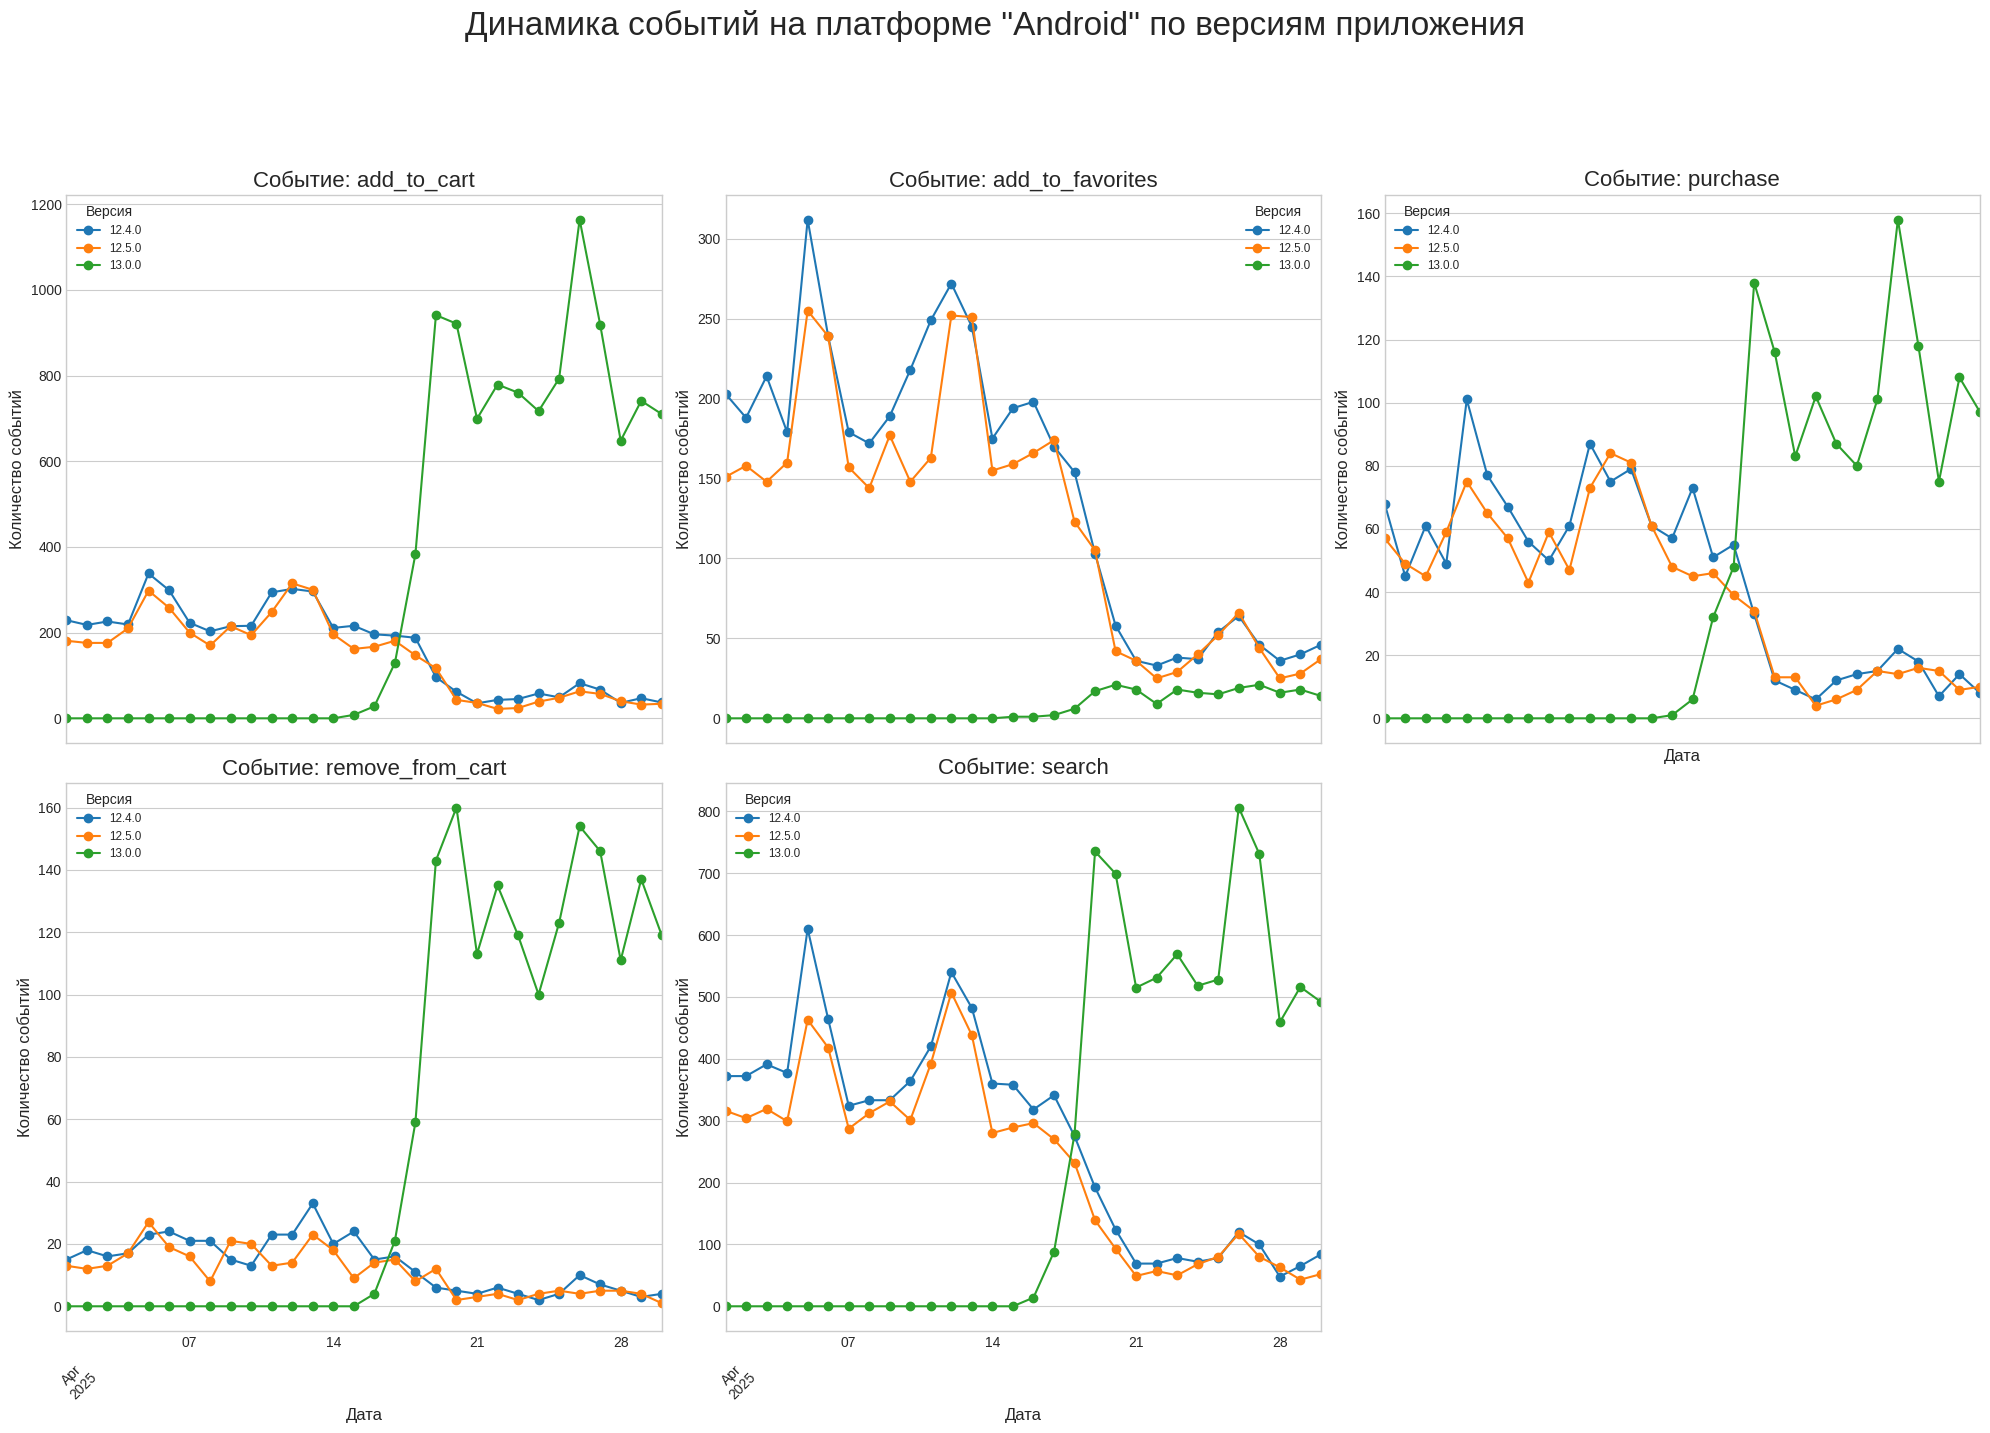

In [64]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(20, 14), sharex=True)
fig.suptitle(f'Динамика событий на платформе "{problem_platform}" по версиям приложения', fontsize=24, y=1.02)
fig.delaxes(axes[1, 2])

all_events = sorted(df['event'].unique())

for i, event in enumerate(all_events):
    ax = axes.flat[i]
    event_data = event_dynamics_by_version.loc[:, (event, slice(None))]
    event_data.columns = event_data.columns.droplevel(0)

    if not event_data.empty:
        event_data.plot(ax=ax, marker='o')
    else:
        ax.text(0.5, 0.5, 'Нет данных', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    ax.set_title(f'Событие: {event}', fontsize=16)
    ax.set_ylabel('Количество событий', fontsize=12)
    ax.set_xlabel('Дата', fontsize=12)
    ax.legend(title='Версия', fontsize='small')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Возможно люди добавляют в корзину вместо добавления в избранное

#### **6. Новости для команды — 1 балл**

На основе проведённого расследования подготовьте сообщение для команды о том, что именно пошло не так.

После последнего обновления на мобильных устройствах Андроид наблюдаются проблемы. Пользователи стали добавлять  гораздо чаще, чем раньше, добавлять товары в корзину и удалять товары из корзины. Возможно, они используют эту функцию не по назначению, надо проверить как работает добавление в избранное, почему эта логика переместилась на корзину, возможно, есть баг или другое неудобство или не понятный сценарий. Так как до обновления - добавление товаров в избранное было существенно выше.  Необходимо углубленное исследование этой проблемы.